# **MATH 360 Modelling Assignment 2: Refined Version**

**Jincheng Hong, 16879926**  
collaborated with: Aiden Densen, Jashan Brar


## PART A: Numerical Solutions

## Instructions

Steps 1 to 4 in the modelling process have been completed for you below and your job is to complete the following tasks:

* Task 1: Apply the nondimensionalization procedure to the system of differential equations appearing at the end of Step 4 below, and interpret dimensionless parameters and scaling factors
* Task 2: Write Python code to compute numerical solutions of the nondimensionalized system and create different figures to clearly present numerical solutions
* Taks 3: Describe qualitative and quantitative properties of the system

For Task 1, you may present your work as LaTeX code in this notebook **or** you may write your solutions on paper.

For Tasks 2 and 3, you must present your work clearly in this notebook in the space below.

Note that it is possible to complete tasks 1 and 2 without understanding all the parts of the model construction. We recommend briefly reading the steps of the modelling process but then go directly to applying the nondimensionalization procedure and computing numerical solutions.

## Step 1: Problem Statement

The water in the North Atlantic ocean circulates between the polar region (near the North Pole) and the equatorial region (near the equator). The ocean currents are caused by the difference in water densities in both regions. Water density decreases with an increase in temperature due to an expansion of the volume, and water density increases with an increase in salinity (ie. salt concentration). The density differential pushes water from the bottom of the ocean in the polar region to the equator. There is also a surface flow from the equator to the polar region which keeps the sea level nearly the same in both regions. Each region also exchanges heat and salinity with the neighboring oceans. Salinity is added to the equatorial region at constant rate due to evaporation, and salinity is removed from the polar region due to precipitation. Construct a mathematical model of the temperature and salinity in both regions of the ocean as water circulates.

## Step 2: Variables and Parameters

| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| ocean temperature near the north pole | $T_0$ | $\Theta$ | dependent variable |
| ocean temperature near the equator | $T_1$ | $\Theta$ | dependent variable |
| ocean salinity near the north pole | $S_0$ | M L<sup>-3</sup> | dependent variable |
| ocean salinity near the equator | $S_1$ | M L<sup>-3</sup> | dependent variable |
| time | $t$ | T | independent variable |
| volume of water in each region | $V$ | L<sup>3</sup> | parameter |
| heat capacity of water | $C$ | M L<sup>2</sup> T<sup>-2</sup> $\Theta$<sup>-1</sup> | parameter |
| volumetric flow rate | $Q$ | L<sup>3</sup> T<sup>-1</sup> | function of $T_0,T_1,S_0,S_1$ |
| density differential to flow rate constant | $k$ | L<sup>6</sup> M<sup>-1</sup> T <sup>-1</sup> | parameter |
| temperature to density constant | $\alpha$ | M L<sup>-3</sup> $\Theta$<sup>-1</sup> | parameter |
| salinity to density constant | $\beta$ | 1 | parameter |
| salinity flux | $H$ | M L<sup>-3</sup> T<sup>-1</sup> | parameter |
| temperature of atmosphere/ocean surrounding polar region | $\theta_0$ | $\Theta$ | parameter |
| temperature of atmosphere/ocean surrounding equatorial region | $\theta_1$ | $\Theta$ | parameter |
| salinity of ocean surrounding polar region | $\sigma_0$ | M L<sup>-3</sup> | parameter |
| salinity of ocean surrounding equatorial region | $\sigma_1$ | M L<sup>-3</sup> | parameter |
| temperature differential to heat flow constant | $c$ | T<sup>-1</sup> | parameter |
| salinity differential to salinity flow constant | $d$ | T<sup>-1</sup> | parameter |

Note: **Salinity** is the concentration of salt in seawater.

## Step 3: Assumptions and Constraints

Simplify the model by representing the system as a pair of connected tanks such that each tank exchanges heat and salinity with its surroundings: 

<img src="model.png" width=500px style="margin: auto;">

* volume of water $V$ and heat capacity $C$ of both regions of the ocean is the same and remains constant
* temperatures $T_0$ and $T_1$ are homogeneous across each region
* salinity $S_0$ and $S_1$ are homogeneous across each region
* density of water decreases linearly with temperature
* density of water increases linearly with salinity
* the flow rate $Q$ is proportional to the difference in water densities
* the bottom flow rate $Q$ from the polar region to the equatorial region is equal to the surface flow rate in opposite direction
* the temperature and salinity in the surrounding atmosphere/ocean are constant
* temperature change due to surroundings is proportional to the difference in temperature, $\frac{dT}{dt} = c(T - \theta)$
* salinity flow from ocean to its surroundings is proportional to the difference in salinity, $\frac{dS}{dt} = d(S - \sigma)$
* constant salinity flow $H$ into equatorial region due to evaopration
* constant salinty flow $H$ out of polar region due to precipitation

## Step 4: Model Construction

Water density $\rho$ depends linearly on temperature $T$ and salinity $S$ therefore $\rho$ is a function of $T$ and $S$ of the form

$$
\rho(T,S) = \gamma - \alpha T + \beta S
$$

for some (positive) parameters $\alpha,\beta,\gamma$. The flow rate $Q$ is proportional to the difference in densities

$$
Q = k(\rho(T_0,S_0) - \rho(T_1,S_1)) = k(\alpha (T_1 - T_0) - \beta (S_1 - S_0))
$$

for some (positive) parameter $k$. It is possible for $Q$ to be positive or negative however the expected behaviour of the system is $Q > 0$ such that water flows from the polar region to the equator. In either case, the flow rate from one to the other is $|Q|$.

The difference in thermal energy between the two regions of the ocean is $C(T_1 - T_0)$ and therefore the difference in thermal energy per unit volume is

$$
\frac{C (T_1 - T_0)}{V}
$$

Since the two regions flow from one to the other at rate $|Q|$ we see that thermal energy is being transferred between the regions at the rate

$$
\frac{C |Q| (T_1 - T_0)}{V}
$$

Heat is also being transferred to the surrounding atmosphere/ocean of each region resulting in a temperature change proportional to the temperature difference. Apply the law of conservation of energy

$$
\begin{align*}
\frac{dT_0}{dt} &= \frac{|Q| (T_1 - T_0)}{V} - c(T_0 - \theta_0) \\
\frac{dT_1}{dt} &= \frac{|Q| (T_0 - T_1)}{V} - c(T_1 - \theta_1)
\end{align*}
$$

Apply the same process to find the flow of salinity between the two regions and also recall that salinity is being added at the equator at rate $H$ and removed in the polar region at rate $H$. Apply the law of conservation of mass to both regions and we find equations

$$
\begin{align*}
\frac{dS_0}{dt} &= \frac{|Q|}{V} (S_1 - S_0) - d(S_0 - \sigma_0) - H \\
\frac{dS_1}{dt} &= \frac{|Q|}{V} (S_0 - S_1) - d(S_1 - \sigma_1) + H
\end{align*}
$$

Altogether, we arrive at a system of differential equations

$$
\begin{align*}
\frac{dT_0}{dt} &= |q| (T_1 - T_0) - c(T_0 - \theta_0) \\
\frac{dT_1}{dt} &= |q| (T_0 - T_1) - c(T_1 - \theta_1) \\
\frac{dS_0}{dt} &= |q| (S_1 - S_0) - d(S_0 - \sigma_0) - H \\
\frac{dS_1}{dt} &= |q| (S_0 - S_1) - d(S_1 - \sigma_1) + H
\end{align*}
$$

where $q = \frac{k}{V}(\alpha (T_1 - T_0) - \beta (S_1 - S_0))$.

## Step 5: Analysis

### Nondimensionalization

**Task 1:** Apply the nondimensionalization procedure to the system of differential equations appearing at the end of Step 4 above, and interpret dimensionless parameters and scaling factors

Let $T_0 = [T]T_0^*,  T_1 = [T]T_1^*, S_0 = [S]S_0^*, S_1 = [S]S_1^*, t = [t]t^*$.  

I choose the same scaling factor for $T_0, T_1$, and the same scaling factor for $S_0, S_1$ because they represent the same concept, and in that case, it's easy and clear to compare them directly.

Also, here $q$ is a combination of variables, so I also choose a scaling factor for $q$. So, also let $$q = [q]q^*,\ \  [q]>0$$ Later, we just need to use $$q^* = \frac{q}{[q]}$$ to backward substitute that.

Note that we first only need to consider equations 1 and 3 when choosing the scaling factors because 2 and 4 are really similar to equation 1 and 3. Plug-in, we have,

$$
\begin{align*}
\frac{[T]}{[t]}\frac{dT_0^*}{dt^*} &= [q]|q^*| [T](T_1^* - T_0^*) - c([T]T_0^* - \theta_0) \\
\frac{[S]}{[t]}\frac{dS_0^*}{dt^*} &= [q]|q^*| [S] (S_1^* - S_0^*) - d([S]S_0^* - \sigma_0) - H \\
\end{align*}
$$



Devide it by the coefficient of the highest order term gives,
$$
\begin{align*}
\frac{1}{[t][q]}\frac{dT_0^*}{dt^*} &= |q^*|(T_1^* - T_0^*) - \frac{c}{[q]}T_0^* + \frac{c\theta_0}{[q][T]} \\
\frac{1}{[t][q]}\frac{dS_0^*}{dt^*} &= |q^*|(S_1^* - S_0^*) - \frac{d}{[q]}S_0^* + \frac{d\sigma_0}{[q][S]} - \frac{H}{[q][S]} \\
\end{align*}
$$

Let $$\frac{1}{[t][q]} = 1, \frac{c}{[q]} = 1, \frac{c\theta_0}{[q][T]}=1, \frac{\sigma_0}{[S]} = 1$$

We got,
$$
[q] = c, \ \ [t] = \frac{1}{c},\ \  [T] = \theta_0,\ \  [S] = \sigma_0
$$

Check the dimensions is consistent, and it indeed is.

Now let's work with $q$, 

$$
\begin{align*}
q^* &= \frac{q}{[q]} \\
    &= \frac{1}{c} q \\
    &= \frac{1}{c}\frac{k}{V}(\alpha (T_1 - T_0) - \beta (S_1 - S_0)) \\
    &= \frac{1}{c}\frac{k}{V}(\alpha [T](T_1^* - T_0^*) - \beta[S] (S_1^* - S_0^*)) \\
    &= \frac{k}{cV}(\alpha \theta_0(T_1^* - T_0^*) - \beta \sigma_0 (S_1^* - S_0^*))
\end{align*}
$$

Altogether, we have our nondimentionalized result,

$$
\begin{align*}
\frac{dT_0^*}{dt^*} &= |q^*| (T_1^* - T_0^*) - T_0^* + 1 \\
\frac{dT_1^*}{dt^*} &= |q^*| (T_0^* - T_1^*) - T_1^* + \frac{\theta_1}{\theta_0} \\
\frac{dS_0^*}{dt^*} &= |q^*| (S_1^* - S_0^*) - \frac{d}{c}(S_0^* - 1) - \frac{H}{c \sigma_0} \\
\frac{dS_1^*}{dt^*} &= |q^*| (S_0^* - S_1^*) - \frac{d}{c}(S_1^* - \frac{\sigma_1}{\sigma_0}) + \frac{H}{c \sigma_0}
\end{align*}
$$
$$
q^* = \frac{k}{cV}(\alpha \theta_0 (T_1^* - T_0^*) - \beta \sigma_0 (S_1^* - S_0^*))
$$

This system depends on parameters including, 
$$\frac{k}{cV}, \alpha\theta_0, \beta \sigma_0,\frac{\theta_1}{\theta_0},  \frac{\sigma_1}{\sigma_0}, \frac{d}{c}, \frac{H}{c\sigma_0}$$

### Numerical Solutions

**Task 2:** Write Python code to compute numerical solutions of the nondimensionalized system and create different figures to clearly present numerical solutions

**Your work here!**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

print("packages imported")

packages imported


In [21]:
alpha = 1
beta = 1
k = 1

V = 100
theta0 = 1
theta1 = 3
sigma0 = 1
sigma1 = 3

c = 1
d = 1
H = 0.3

In [22]:
def f(u,t):
    dudt = np.zeros(4)
    q = k/(c*V) * (alpha*theta0*(u[1] - u[0]) - beta*sigma0*(u[3] - u[2]))
    dudt[0] = np.absolute(q) * (u[1] - u[0]) - u[0] + 1
    dudt[1] = np.absolute(q) * (u[0] - u[1]) - u[1] + theta1 / theta0
    dudt[2] = np.absolute(q) * (u[3] - u[2]) - d/c*(u[2]-1) - H/(c*sigma0)
    dudt[3] = np.absolute(q) * (u[2] - u[3]) - d/c*(u[3]-sigma1/sigma0) 
    + H/(c*sigma0)
    return dudt

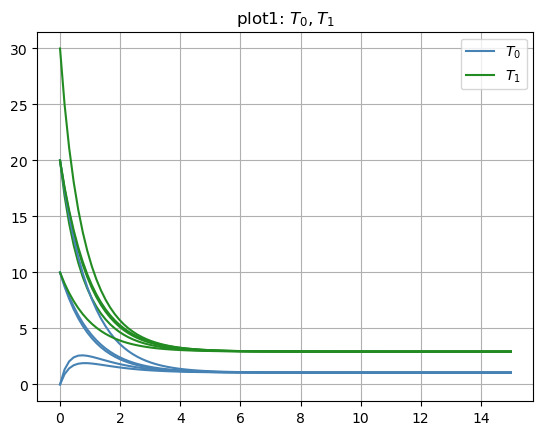

In [38]:
u0s = [[0,20,10,5],
      [0,30,7,5],
      [10,20,5,5],
      [20,20,0,5],
      [10,10,10,10]]
for u0 in u0s:
    t = np.linspace(0,15,100)
    U = spi.odeint(f,u0,t)
    plt.plot(t,U[:,0],"steelblue")
    plt.plot(t,U[:,1],"forestgreen")
plt.grid()
plt.title("plot1: $T_0, T_1$")
plt.legend(['$T_0$','$T_1$'])
plt.show()

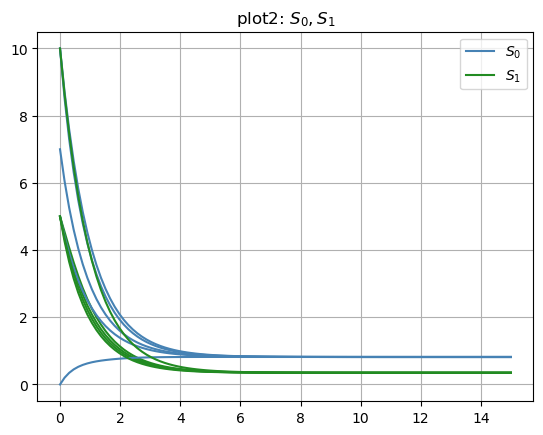

In [39]:
u0s = [[0,20,10,5],
      [0,30,7,5],
      [10,20,5,5],
      [20,20,0,5],
      [10,10,10,10]]
for u0 in u0s:
    t = np.linspace(0,15,100)
    U = spi.odeint(f,u0,t)
    plt.plot(t,U[:,2],"steelblue")
    plt.plot(t,U[:,3],"forestgreen")
plt.title("plot2: $S_0, S_1$")
plt.legend(['$S_0$','$S_1$'])
plt.grid()
plt.show()

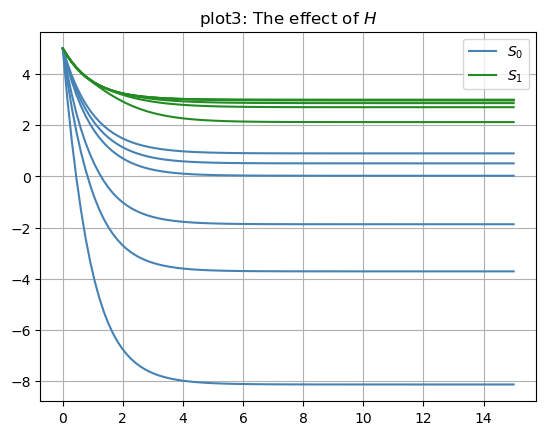

In [45]:
alpha = 1
beta = 1
k = 1

V = 100
theta0 = 1
theta1 = 3
sigma0 = 1
sigma1 = 3

c = 1
d = 1
Hs = [0.1,0.5,1.0,3.0,5.0,10.0]
u0 = [10,20,5,5]

for H in Hs:
    def f(u,t):
        dudt = np.zeros(4)
        q = k/(c*V) * (alpha*theta0*(u[1] - u[0]) - beta*sigma0*(u[3] - u[2]))
        dudt[0] = np.absolute(q) * (u[1] - u[0]) - u[0] + 1
        dudt[1] = np.absolute(q) * (u[0] - u[1]) - u[1] + theta1 / theta0
        dudt[2] = np.absolute(q) * (u[3] - u[2]) - d/c*(u[2]-1) - H/(c*sigma0)
        dudt[3] = np.absolute(q) * (u[2] - u[3]) - d/c*(u[3]-sigma1/sigma0) 
        + H/(c*sigma0)
        return dudt
    
    t = np.linspace(0,15,100)
    U = spi.odeint(f,u0,t)
    plt.plot(t,U[:,2],"steelblue")
    plt.plot(t,U[:,3],"forestgreen")

plt.title("plot3: The effect of $H$")
plt.legend(['$S_0$','$S_1$'])
plt.grid()
plt.show()

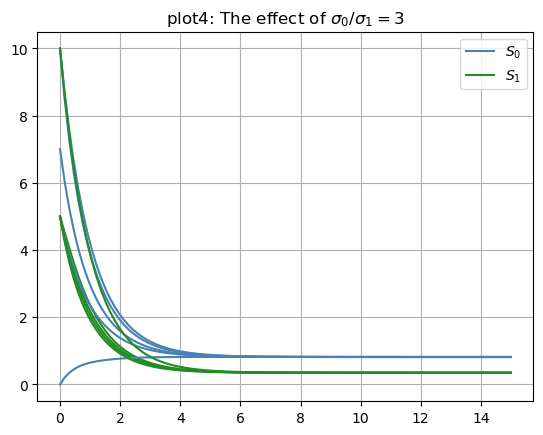

In [43]:
alpha = 1
beta = 1
k = 1

V = 100
theta0 = 1
theta1 = 3
sigma0 = 3
sigma1 = 1

c = 1
d = 1
H = 0.5

def f(u,t):
    dudt = np.zeros(4)
    q = k/(c*V) * (alpha*theta0*(u[1] - u[0]) - beta*sigma0*(u[3] - u[2]))
    dudt[0] = np.absolute(q) * (u[1] - u[0]) - u[0] + 1
    dudt[1] = np.absolute(q) * (u[0] - u[1]) - u[1] + theta1 / theta0
    dudt[2] = np.absolute(q) * (u[3] - u[2]) - d/c*(u[2]-1) - H/(c*sigma0)
    dudt[3] = np.absolute(q) * (u[2] - u[3]) - d/c*(u[3]-sigma1/sigma0) 
    + H/(c*sigma0)
    return dudt

u0s = [[0,20,10,5],
      [0,30,7,5],
      [10,20,5,5],
      [20,20,0,5],
      [10,10,10,10]]
for u0 in u0s:
    t = np.linspace(0,15,100)
    U = spi.odeint(f,u0,t)
    plt.plot(t,U[:,2],"steelblue")
    plt.plot(t,U[:,3],"forestgreen")
plt.title("plot4: The effect of $\sigma_0/\sigma_1=3$")
plt.legend(['$S_0$','$S_1$'])
plt.grid()
plt.show()

### Describe Qualitative and Quantitative Properties of the System

**Task 3:** Describe qualitative and quantitative properties of the system

**Your work here!**

**The behavior of this model**  
From plot 1, we see that this model has some steady state solution for temperatures: $T_0^* \approx 0.25$ and $T_1^* \approx 0.60$. This make sense if we recall that $T_0$ is the temperature near the north pole and $T_1$ is the temperature around the equator. We expect the temperature to belower in the polar areas.

From plot 2, we can see that the salinities also have steady state solutions: $S_0^* \approx 0.25$ and $S_1^* \approx 0.50$. Looking up, we find that the salinity are expected to be lower in polar areas, which indicates that $S_0 < S_1$. And that is well reflected in our model. However, this seems not always the case: it depends on initial conditions. (See the effect of )

**The effect of $H$**  
From plot 3, we see that for different $H$, we have different steady state solutions for $S_0$ and $S_1$. With $H$ increase, $S_0$ decrease and $S_1$ increase. And some of them even have unreasonable results because $S_0<0$, which is impossible. Let's recall the meaning of $H$ is the salinity flux: the rate of salinity flowing from the north pole region to the equator region. We can then explain: if there're a lot of salt flowing out from the polar region, $S_0$ should reach a steady state with lower salinity. We can tell by this model that $0<H<3$ approximately.


**The effect of $\frac{\sigma_0}{\sigma_1}$**  
From plot 4, we found that the steady steady solution for salinity actually depends on $\frac{\sigma_0}{\sigma_1}$, that is, the salinity of water surrounding them. If the salinity of the surrounding water in the polar region is greater that that in the equator region, then a completely converse solution is shown, with $S_1 < S_0$. It tells us that $\frac{\sigma_0}{\sigma_1}$ is important for the overall behavior of salinity of this model.